# Face recognition

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [18]:
!pip install MTCNN


  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [21]:
# cette bibliotheque permet de selectionner une partie du visage 
from mtcnn.mtcnn import MTCNN
import os

In [22]:
!pip install tensorflow


# <font color='red'>1 - Face detection : le mtcnn</font> 

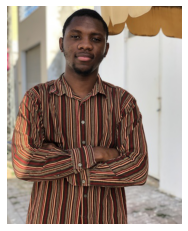

In [23]:
filename = "img.jpg"
image = mpimg.imread(filename)
plt.imshow(image)
plt.axis("off")
plt.show()

In [24]:
# les taille des images 


image.shape

(406, 326, 3)

In [25]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image)

# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

1/1 [==============================] - 0s 114ms/step


In [26]:
results

[{'box': [108, 22, 73, 97],
  'confidence': 1.0,
  'keypoints': {'left_eye': (129, 58),
   'right_eye': (164, 61),
   'nose': (146, 75),
   'mouth_left': (128, 94),
   'mouth_right': (160, 96)}}]

In [30]:
import cv2 
keypoints = results[0]['keypoints']

start_point = (x1, y1) 
end_point = (x2,y2)
color = (0, 255,0 )
thickness = 2
image_with_box = cv2.rectangle(image, start_point, end_point, color, thickness)

image_with_box = cv2.circle(image_with_box,(keypoints['left_eye']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['right_eye']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['nose']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['mouth_left']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['mouth_right']), 2, color, thickness)

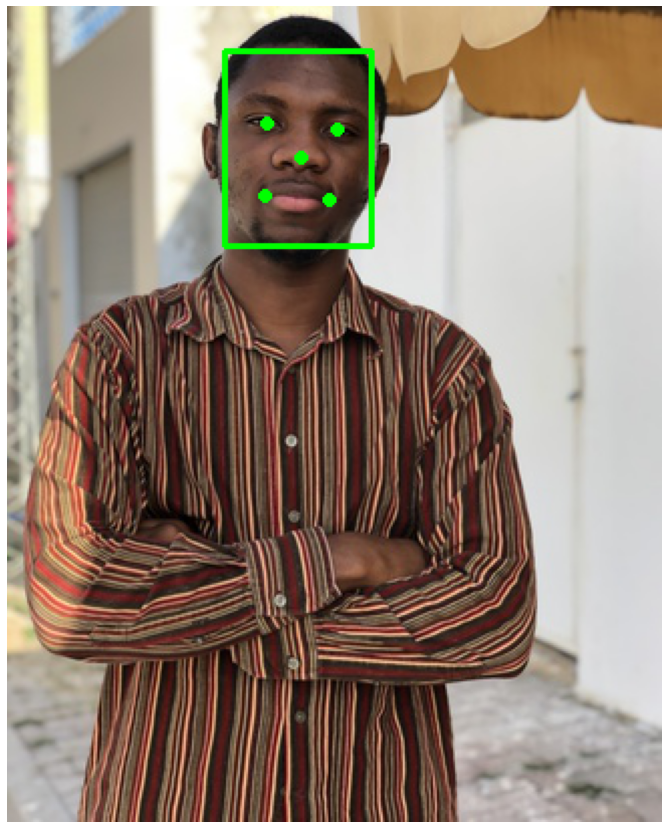

In [31]:
plt.figure(figsize = (18,15))
plt.imshow(image_with_box)
plt.axis("off")
plt.show()

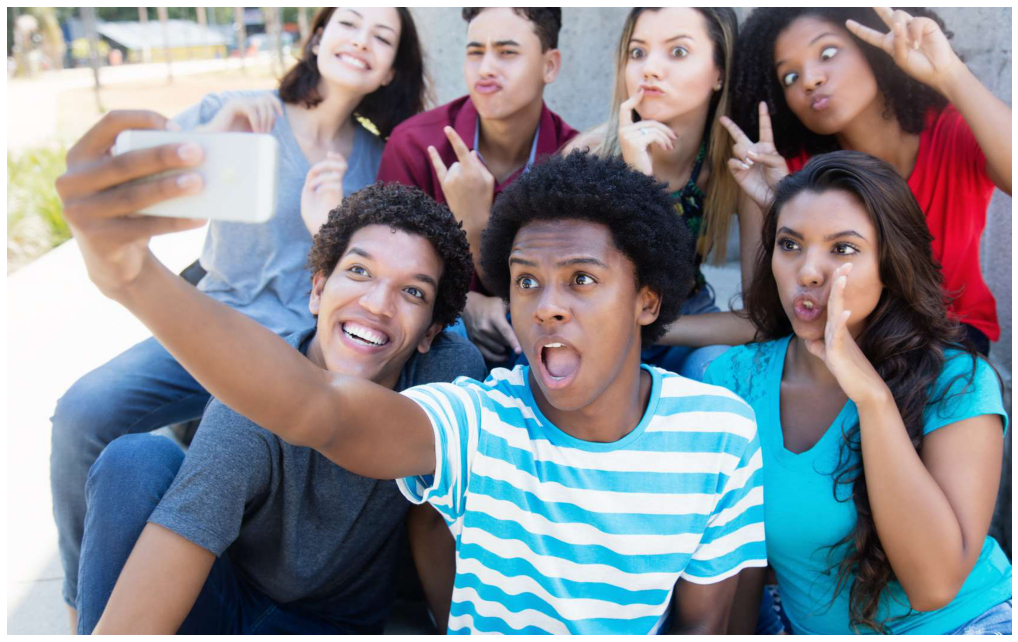

In [32]:
selfie = "selfie.jpg"
selfie = mpimg.imread(selfie)

plt.figure(figsize = (18,15))
plt.imshow(selfie)
plt.axis("off")
plt.show()

In [ ]:
results = detector.detect_faces(selfie)

In [33]:
for bounding in results:
    # extract the bounding box from the first face
    x1, y1, width, height = bounding['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    keypoints = bounding['keypoints']

    start_point = (x1, y1) 
    end_point = (x2,y2)
    color = (0, 255,0 )
    thickness = 2
    image_with_box = cv2.rectangle(selfie, start_point, end_point, color, thickness)

    image_with_box = cv2.circle(image_with_box,(keypoints['left_eye']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['right_eye']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['nose']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['mouth_left']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['mouth_right']), 2, color, thickness)
    
    

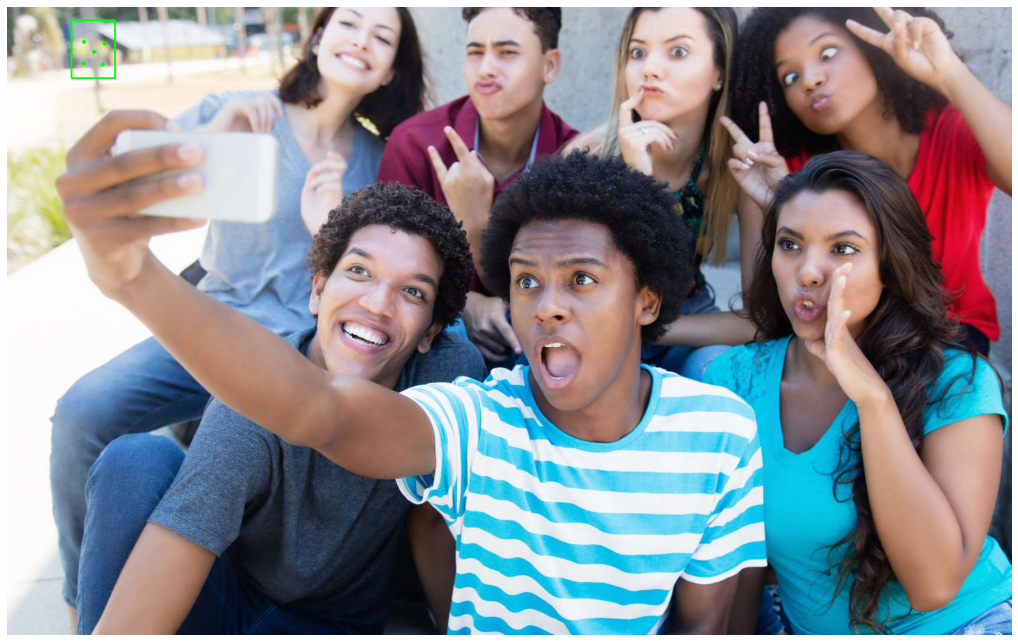

In [34]:
plt.figure(figsize = (18,15))
plt.imshow(image_with_box)
plt.axis("off")
plt.show()

## écrivons une fonction qui nous retourne le visage

In [36]:

def extract_face(filename, required_size=(160, 160)):
    """
    fonction permettant d'extraire une face à partir d'une photo et de resizer la face pour qu'elle soit utilisée
    par le facenet
    """
    # load image from file
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    
    # create the mtcnn detector
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(image)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = image[y1:y2, x1:x2]
    
    # resize pixels to the model size(facenet)
    face_resize = cv2.resize(face,required_size)
    return face_resize

In [37]:
face_steve = extract_face(filename)

1/1 [==============================] - 0s 144ms/step


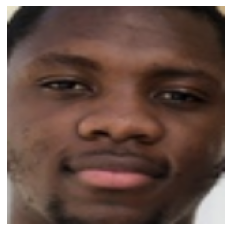

In [38]:
plt.imshow(face_steve)
plt.axis("off")
plt.show()

In [39]:
face_steve.shape

(160, 160, 3)

1/1 [==============================] - 0s 231ms/step
1 (160, 160, 3)


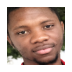

In [52]:
# specify folder to plot
folder = 'dataset/train/steve/'
i = 1
filenames = os.listdir(folder)[:10]
# enumerate files
for filename in filenames:

    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    plt.subplot(2, 5, i)
    plt.axis('off')
    plt.imshow(face)
    i += 1
plt.show()

## Chargeons notre dataset

In [53]:
# charger les images de tout un repertoire dans une liste
def load_faces(directory):
    faces = list()
    
    for filename in os.listdir(directory):

        path = directory + filename
        face = extract_face(path)
        faces.append(face)
    return faces
 
#charger un repertoire contenant plusieurs repertoires d'images labelisées
def load_dataset(directory):
    x, y = list(), list()
    
    #pour chaque personne (label)
    for subdir in os.listdir(directory):
    
        path = directory + subdir + '/'
       
        
        #on s'assure que path est bien un dossier et non un fichier
        if os.path.isdir(path):
            
            #on charge toutes les faces avec la fonction lod_faces
            faces = load_faces(path)
            
            #on crée maintenant les labels
            labels = [subdir for i in range(len(faces))]
            
            #petites infos
            print("nous avons chargé {} photos de {}".format(len(faces),subdir))
            
            #ajouter nos face à la liste final
            x.extend(faces)
            y.extend(labels)
    return np.asarray(x), np.asarray(y)

In [65]:
# load train dataset
x_train, y_train = load_dataset('dataset/train/')
print(x_train.shape, y_train.shape)

# load test dataset
x_test, y_test = load_dataset('dataset/val/')
print(x_test.shape, y_test.shape)

#enregistrons nos données sous forme compressée
#nous utiliserons np.load pour quitter de la forme compressée à la forme normale
np.savez_compressed('faces-dataset.npz', x_train, y_train, x_test, y_test)

1/1 [==============================] - 0s 134ms/step
nous avons chargé 14 photos de ben_afflek
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 133ms/step
nous avons chargé 17 photos de elton_john
1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 129ms/step
nous avons chargé 21 photos de jerry_seinfeld
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 130ms/step
nous avons chargé 19 photos de madonna
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 134ms/step
nous avons chargé 22 photos de mindy_kaling
1/1 [==============================] - 0s 132ms/step
nous avons chargé 1 photos de steve
(94, 160, 160, 3) (94,)
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 126ms/step
nous avons chargé 5 photos de ben_afflek
1/1 [==============================] - 0s 132ms/step
nous avons chargé 5 photos de elton_john
1/1 [==============================] - 0s 154ms/step
nous avons chargé 5 photos de jerry_seinfeld
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 139ms/step
nous avons chargé 5 photos de madonna
1/1 [==============================] - 0s 135ms/step
nous avons chargé 5 photos de mindy_kaling
(25, 160, 160, 3) (25,)


In [66]:
#chargeons nos données
data = np.load('faces-dataset.npz')
x_train_face, y_train_face, x_test_face, y_test_face = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', x_train_face.shape, y_train_face.shape, x_test_face.shape, y_test_face.shape)

Loaded:  (94, 160, 160, 3) (94,) (25, 160, 160, 3) (25,)


In [67]:
plt.figure()
plt.imshow(x_train_face[101])
plt.title(y_train_face[101])
plt.axis("off")
plt.show()

IndexError: index 101 is out of bounds for axis 0 with size 94

<Figure size 432x288 with 0 Axes>

# <font color='red'>2 - Face embedding : le facenet</font> 

## Comment fonctionne le facenet ?

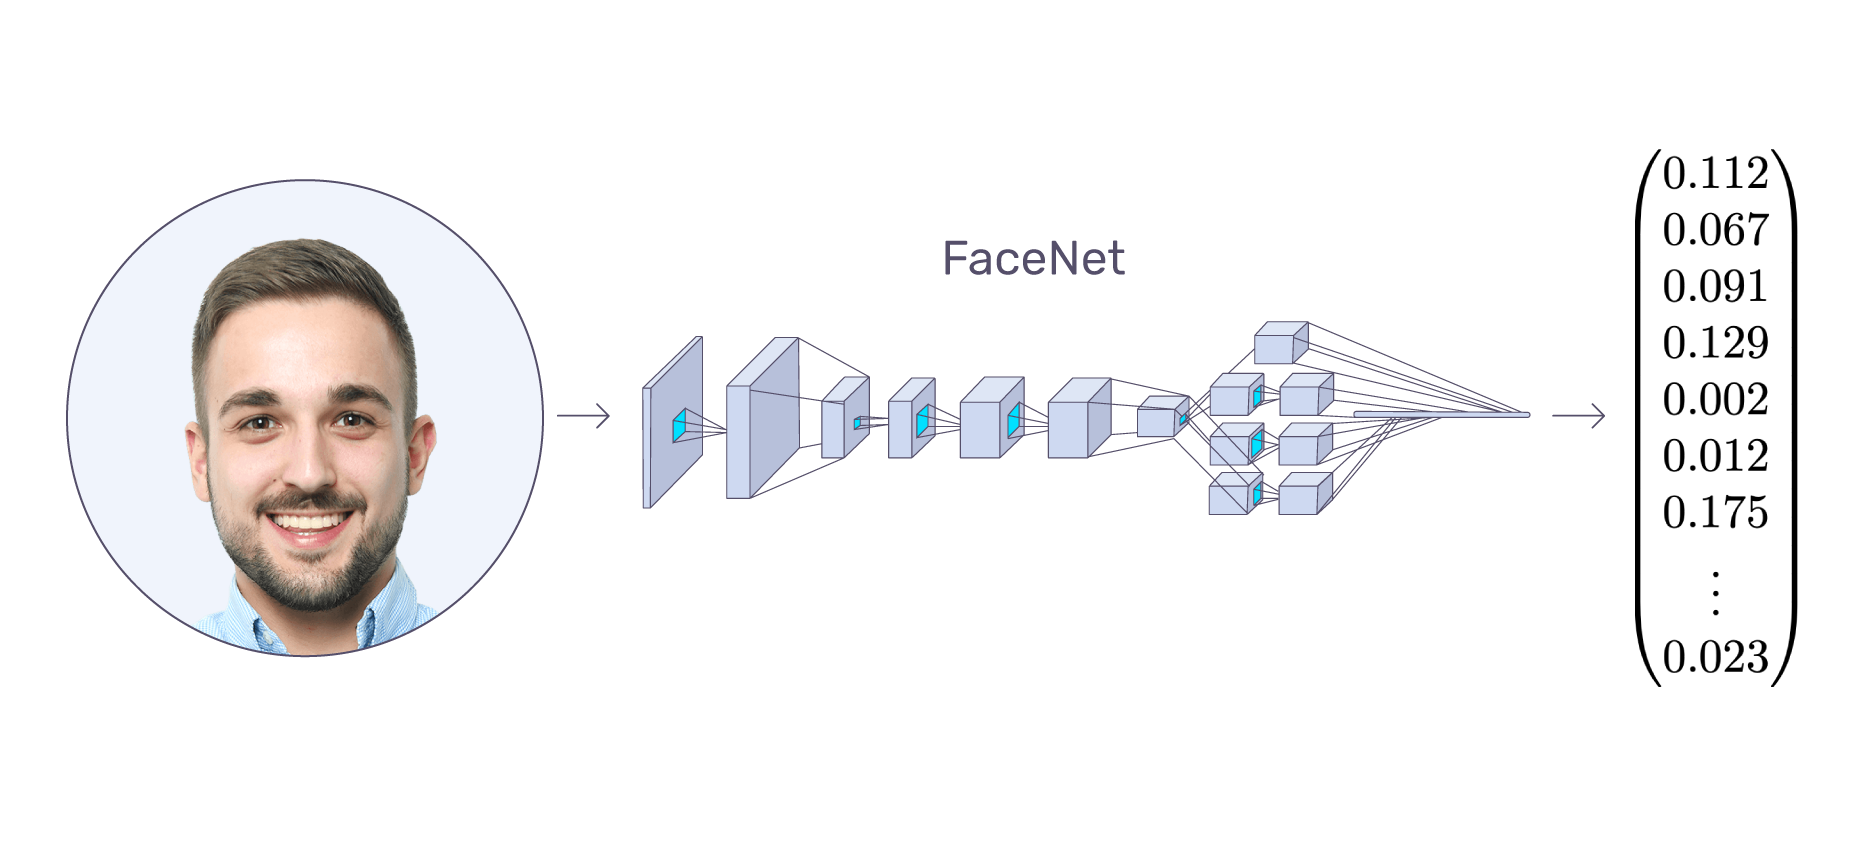

In [ ]:
%%HTML
<img src = "media/facenet-brki-ana.png" width="500" height="400"/>

In [ ]:
%%HTML
<img src = "media/initial-state.png" width="500" height="400"/>

In [ ]:
%%HTML
<video width="800" height="400" controls>
  <source src="media/learning.mp4" type="video/mp4">
</video>

In [ ]:
# load the model
facenet = tf.keras.models.load_model('facenet_keras.h5')

print(facenet.inputs)
print(facenet.outputs)

In [ ]:
facenet.summary()

In [ ]:
def get_embedding(model, face_pixels):
    """
    cette fonction permet d'obtenir les embedding d'un visage en procédant d'abord à la normalisation réquise par le facenet
    """
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    
    # transform face into one sample
    sample = face_pixels[np.newaxis]
    
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [ ]:
emb_steve = get_embedding(facenet,face_steve)

In [ ]:
emb_steve.shape

In [ ]:
#nous pouvons desormais enregister les embedding de steve dans notre base de donnée 
#et les utilisés comme référence pour face verification ou face recognition

In [ ]:
# convertissons toutes les faces d'entrainement en embedding
x_train_e = list()
for face_pixels in x_train_face:
    embedding = get_embedding(facenet, face_pixels)
    x_train_e.append(embedding)
    
x_train_e = np.asarray(x_train_e)
print(x_train_e.shape)

# convertissons toutes les faces de test en embedding
x_test_e = list()
for face_pixels in x_test_face:
    embedding = get_embedding(facenet, face_pixels)
    x_test_e.append(embedding)
x_test_e = np.asarray(x_test_e)
print(x_test_e.shape)

# save arrays to one file in compressed format
np.savez_compressed('faces-embeddings.npz', x_train_e, y_train_face, x_test_e, y_test_face)

In [ ]:
# chargeons le dataset
data = np.load('faces-embeddings.npz')
x_train, y_train, x_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# <font color='red'>3 - Face classification : le svc</font> 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [ ]:
#normalisons nos labels
out_encoder = LabelEncoder()
y_train = out_encoder.fit_transform(y_train)
y_test = out_encoder.transform(y_test)

y_train

In [ ]:
out_encoder.classes_

In [ ]:
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

# predict
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# score
score_train = accuracy_score(y_train, ypred_train)
score_test = accuracy_score(y_test, ypred_test)
# summarize
print('train_accuracy = {:.3f}, test_accuracy = {:.3f}'.format(score_train*100, score_test*100))

In [ ]:
print(classification_report(y_test, ypred_test,digits=2,target_names = list(out_encoder.classes_)))

In [ ]:
x_test_face.shape

In [ ]:
# test model on a random examplfrom the test dataset
selection = np.random.choice([i for i in range(x_test.shape[0])],size = 12)
random_face_pixels = x_test_face[selection]
random_face_emb = x_test[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform(random_face_class)

# prediction for the face
ypred_class = model.predict(random_face_emb)
ypred_prob = model.predict_proba(random_face_emb)

# get expected name
class_index = ypred_class
class_probability = [ypred_prob[i,x] for i,x in enumerate(ypred_class)] * 100
predict_names = out_encoder.inverse_transform(ypred_class)


# plot
plt.figure(figsize = (18,15))
for i in range(0,len(predict_names)):
    ax = plt.subplot(3,4,i+1)
    plt.axis("off")
    plt.imshow(random_face_pixels[i])
    ax.set_title("predicted = {}\nprob = {:.3f}\nexpected = {}".format(predict_names[i],class_probability[i],random_face_name[i]))
plt.show()

In [ ]:
def angle(emb_person1,emb_person2):
    alpha = np.sum((emb_person1*emb_person2))/(np.linalg.norm(emb_person1)*np.linalg.norm(emb_person2))
    alpha = (np.arccos(alpha)*180)/np.pi
    
    return alpha

In [ ]:
plt.imshow(x_test_face[25])
plt.title(y_test_face[25])
plt.axis("off")
plt.show()

In [ ]:
#petit test
plt.figure(figsize = (20,6))
j = 1
for i in [0,5,13,18,24,26]:
    #calcul de l'angle
    alpha = angle(x_test[25],x_test[i])
    
    ax = plt.subplot(1,6,j)
    j +=1
    
    plt.imshow(x_test_face[i])
    ax.set_title("l'angle est de = {:.3f}".format(alpha))
    plt.axis("off")

In [68]:
#definir le nouveau dataset

#detectons les visages
x_train_cos, y_train_cos = load_dataset('dataset_cos/')

#predisons les embeddings
x_train_emb_cos = list()
for face_pixels in x_train_cos:
    embedding = get_embedding(facenet, face_pixels)
    x_train_emb_cos.append(embedding)
    
x_train_emb_cos = np.asarray(x_train_emb_cos)

1/1 [==============================] - 0s 164ms/step
nous avons chargé 1 photos de ben_afflek
1/1 [==============================] - 0s 153ms/step
nous avons chargé 1 photos de elton_john
1/1 [==============================] - 0s 138ms/step
nous avons chargé 1 photos de jerry_seinfeld
1/1 [==============================] - 0s 134ms/step
nous avons chargé 1 photos de madonna
1/1 [==============================] - 0s 144ms/step
nous avons chargé 1 photos de mindy_kaling
1/1 [==============================] - 0s 142ms/step
nous avons chargé 1 photos de steve


NameError: name 'get_embedding' is not defined

In [69]:
x_train_emb_cos.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
test = "adp,k"
test[1:-1]

In [ ]:
import numpy as np

x = np.array([1.1,0.255,-0.2533,-1.0232])
print(x.shape)

In [ ]:
array_string = '[ 8.77417326e-07,-4.09070671e-01]'

In [ ]:
a =array_string[1:-1].split(",")

In [ ]:
b =[float(elt) for elt in a]
np.array(b)

In [ ]:
sd = list()
sd.append(b)
sd

In [ ]:
def fromStringArrayToFloatArray(stringArray):
    array = [float(s) for s in stringArray[1:-1].split(',')]
    return np.array(array)

In [ ]:
fromStringArrayToFloatArray(array_string).shape

In [ ]:
def face_verification(emb_person1,emb_person2,treshold = 75):
    alpha = angle(emb_person1,emb_person2)
    print(alpha)
    return int(alpha<treshold)

In [ ]:
def face_recognition(emb,emb_connues,nom_connus,treshold = 75):
    angles = list()
    
    for emb_connu in emb_connues:
        angles.append(angle(emb,emb_connu))
        
    if min(angles)<treshold:
        return nom_connus[np.argmin(angles)]
    else:
        return "inconnu"

In [ ]:
# test model on a random examplfrom the test dataset
selection = np.random.choice([i for i in range(x_test.shape[0])],size = 12)
random_face_pixels = x_test_face[selection]
random_face_emb = x_test[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform(random_face_class)

predict_names = [face_recognition(x,x_train_emb_cos,y_train_cos) for x in random_face_emb]


# plot
plt.figure(figsize = (18,15))
for i in range(0,len(predict_names)):
    ax = plt.subplot(3,4,i+1)
    plt.axis("off")
    plt.imshow(random_face_pixels[i])
    ax.set_title("predicted = {}\n expected = {}".format(predict_names[i],random_face_name[i]))
plt.show()

In [ ]:
#testons notre modèle avec 2 personnes qui se ressemblent (mon petit frère et moi)

In [ ]:
face_steve = extract_face('img.jpg')
face_daniel= extract_face('daniel.jpg')

In [ ]:
plt.figure(figsize = (10,6))

ax = plt.subplot(1,2,1)
plt.imshow(face_steve)
ax.set_title("steve")
plt.axis("off")

ax = plt.subplot(1,2,2)
plt.imshow(face_daniel)
ax.set_title("daniel")
plt.axis("off")


In [ ]:
emb_steve = get_embedding(facenet, face_steve)
emb_daniel = get_embedding(facenet, face_daniel)

In [ ]:
face_verification(emb_steve,emb_daniel)

In [ ]:
#donc le modèle a su faire la différence entre nous

In [ ]:
#testons face_recognition sur mon frère
face_recognition(emb_daniel,x_train_emb_cos,y_train_cos)